In [7]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as snb
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,PowerTransformer
from pprint import pprint
from scipy import stats 
import re
import copy

In [8]:
df = pd.read_csv(r"D:\Sem 5\ML LABS\DataSets\Foodpanda Analysis Dataset.csv")

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      6000 non-null   object 
 1   gender           6000 non-null   object 
 2   age              6000 non-null   object 
 3   city             6000 non-null   object 
 4   signup_date      6000 non-null   object 
 5   order_id         6000 non-null   object 
 6   order_date       6000 non-null   object 
 7   restaurant_name  6000 non-null   object 
 8   dish_name        6000 non-null   object 
 9   category         6000 non-null   object 
 10  quantity         6000 non-null   int64  
 11  price            6000 non-null   float64
 12  payment_method   6000 non-null   object 
 13  order_frequency  6000 non-null   int64  
 14  last_order_date  6000 non-null   object 
 15  loyalty_points   6000 non-null   int64  
 16  churned          6000 non-null   object 
 17  rating        

In [10]:
df.drop(columns=['order_id','order_date','customer_id','signup_date','last_order_date','rating_date'],inplace=True)
df.head()

,gender,age,city,restaurant_name,dish_name,category,quantity,price,payment_method,order_frequency,loyalty_points,churned,rating,delivery_status
0,Male,Adult,Peshawar,McDonald's,Burger,Italian,5,1478.27,Cash,38,238,Active,3,Cancelled
1,Male,Adult,Multan,KFC,Burger,Italian,3,956.04,Wallet,24,81,Active,2,Delayed
2,Other,Senior,Multan,Pizza Hut,Fries,Italian,2,882.51,Cash,42,82,Inactive,3,Delayed
3,Female,Senior,Peshawar,Subway,Pizza,Dessert,4,231.30,Card,27,45,Inactive,2,Delayed
4,Other,Senior,Lahore,KFC,Sandwich,Dessert,1,1156.69,Cash,35,418,Inactive,3,Cancelled


In [16]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
obj_cols = [col for col in df.columns if df[col].dtype == 'object']

# num_cols = df.select_dtypes(include='number')
# obj_cols = df.select_dtypes(include='object')

print(f"Numerical Columns:\n {num_cols}")
print(f"Categorical Columns: {obj_cols}")


Numerical Columns:
 ['quantity', 'price', 'order_frequency', 'loyalty_points', 'rating']
Categorical Columns: ['gender', 'age', 'city', 'restaurant_name', 'dish_name', 'category', 'payment_method', 'churned', 'delivery_status']


In [17]:
dfnum = df[num_cols].copy(deep=True)
dfnum.describe()

,quantity,price,order_frequency,loyalty_points,rating
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2.991667,800.524880,25.304667,250.173667,2.996833
std,1.414778,404.855029,14.358930,144.608478,1.406113
min,1.000000,100.300000,1.000000,0.000000,1.000000
25%,2.000000,441.997500,13.000000,125.000000,2.000000
50%,3.000000,806.460000,25.000000,249.500000,3.000000
75%,4.000000,1149.737500,37.000000,378.000000,4.000000
max,5.000000,1499.950000,50.000000,500.000000,5.000000


gender             0
age                0
city               0
restaurant_name    0
dish_name          0
category           0
quantity           0
price              0
payment_method     0
order_frequency    0
loyalty_points     0
churned            0
rating             0
delivery_status    0
dtype: int64

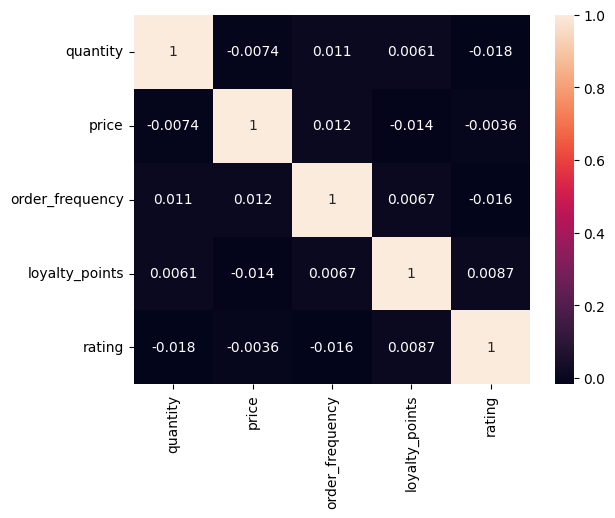

In [ ]:
snb.heatmap(data=df[num_cols].corr(),annot=True)
    
df.isnull().sum()
    

In [ ]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [ ]:
skewness = df[num_cols].skew()
print(f"Checking Skewnees :{skewness}")

Checking Skewnees :quantity           0.014732
price              0.004289
order_frequency    0.050694
loyalty_points     0.008964
rating            -0.008057
dtype: float64


In [ ]:
cat_dict = {col:df[col].unique().tolist() for col in obj_cols}
pprint(cat_dict)

{'age': ['Adult', 'Senior', 'Teenager'],
 'category': ['Italian', 'Dessert', 'Fast Food', 'Continental', 'Chinese'],
 'churned': ['Active', 'Inactive'],
 'city': ['Peshawar', 'Multan', 'Lahore', 'Karachi', 'Islamabad'],
 'delivery_status': ['Cancelled', 'Delayed', 'Delivered'],
 'dish_name': ['Burger', 'Fries', 'Pizza', 'Sandwich', 'Pasta'],
 'gender': ['Male', 'Other', 'Female'],
 'payment_method': ['Cash', 'Wallet', 'Card'],
 'restaurant_name': ["McDonald's", 'KFC', 'Pizza Hut', 'Subway', 'Burger King']}


In [ ]:
df[obj_cols] = df[obj_cols].apply(lambda x: x.str.strip())
df[obj_cols] = df[obj_cols].apply(lambda x: x.str.lower())

cat_dict = {col:df[col].unique().tolist() for col in obj_cols}
pprint(cat_dict)

{'age': ['adult', 'senior', 'teenager'],
 'category': ['italian', 'dessert', 'fast food', 'continental', 'chinese'],
 'churned': ['active', 'inactive'],
 'city': ['peshawar', 'multan', 'lahore', 'karachi', 'islamabad'],
 'delivery_status': ['cancelled', 'delayed', 'delivered'],
 'dish_name': ['burger', 'fries', 'pizza', 'sandwich', 'pasta'],
 'gender': ['male', 'other', 'female'],
 'payment_method': ['cash', 'wallet', 'card'],
 'restaurant_name': ["mcdonald's", 'kfc', 'pizza hut', 'subway', 'burger king']}


In [ ]:
print(df['age'].unique())

def Assign_Age_label(x):
    if x == 'teenager':
        return 0
    elif x == 'adult':
        return 1
    elif  x == 'senior':
        return 2
    return -1

df['age'] = df['age'].apply(Assign_Age_label)


['adult' 'senior' 'teenager']


In [ ]:
print(df['age'].value_counts())

age
0    2062
1    1984
2    1954
Name: count, dtype: int64



CROSSTAB: Gender vs Churned
churned  active  inactive
gender                   
female     50.9      49.1
male       50.0      50.0
other      49.9      50.1


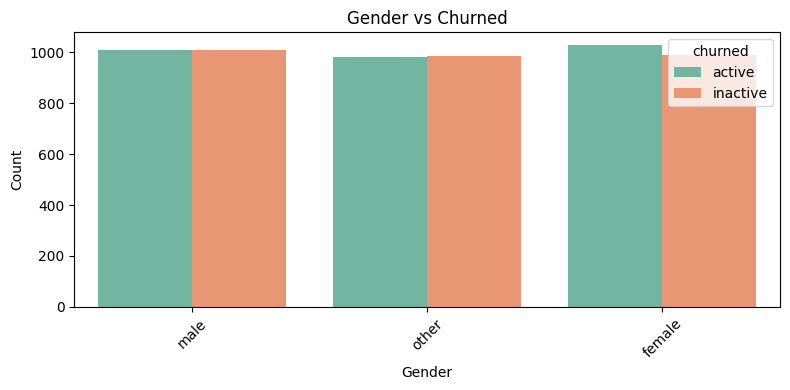


CROSSTAB: Age vs Churned
churned  active  inactive
age                      
0          50.7      49.3
1          51.5      48.5
2          48.6      51.4


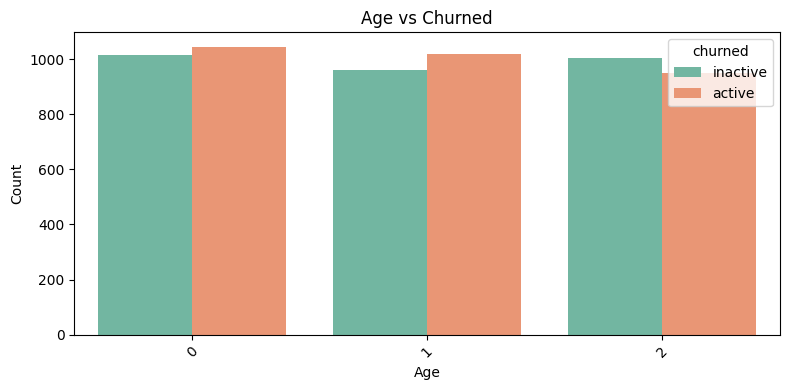


CROSSTAB: City vs Churned
churned    active  inactive
city                       
islamabad    50.7      49.3
karachi      52.1      47.9
lahore       48.2      51.8
multan       48.4      51.6
peshawar     52.1      47.9


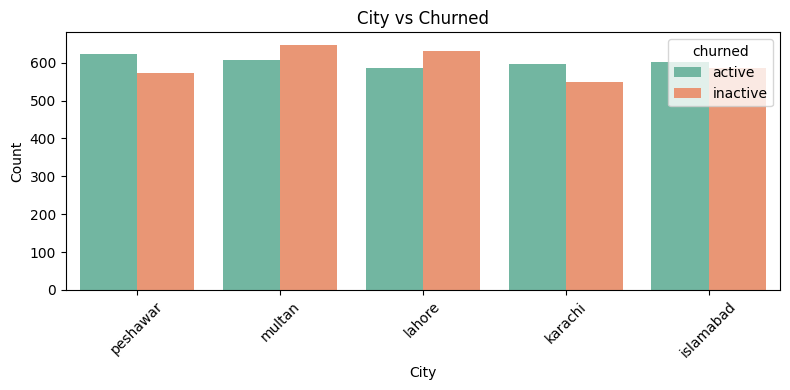


CROSSTAB: Restaurant_Name vs Churned
churned          active  inactive
restaurant_name                  
burger king        51.2      48.8
kfc                49.2      50.8
mcdonald's         53.1      46.9
pizza hut          48.7      51.3
subway             49.4      50.6


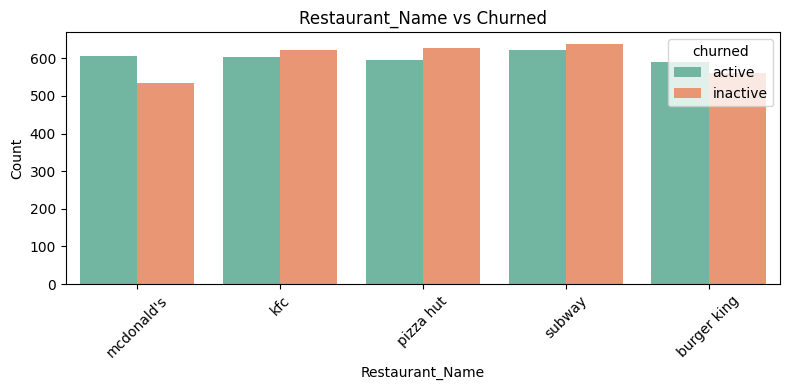


CROSSTAB: Dish_Name vs Churned
churned    active  inactive
dish_name                  
burger       50.3      49.7
fries        47.6      52.4
pasta        49.9      50.1
pizza        50.9      49.1
sandwich     52.5      47.5


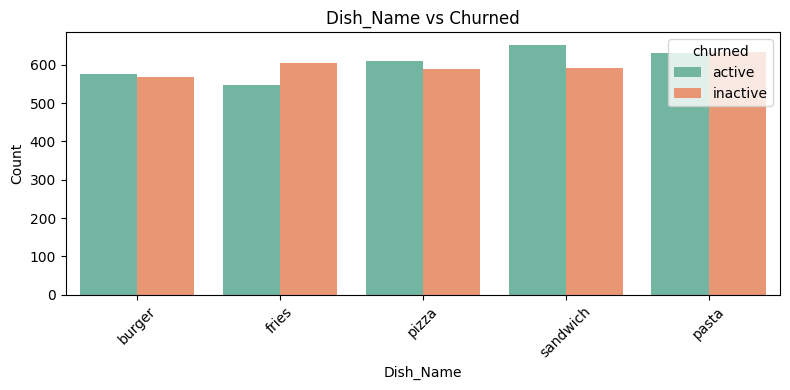


CROSSTAB: Category vs Churned
churned      active  inactive
category                     
chinese        51.2      48.8
continental    49.6      50.4
dessert        50.7      49.3
fast food      51.7      48.3
italian        48.2      51.8


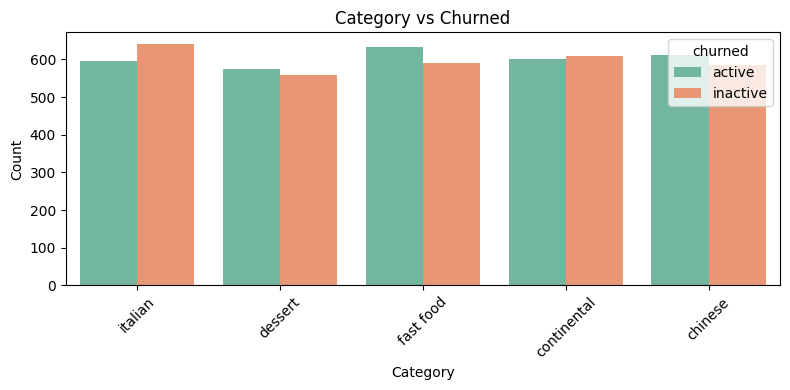


CROSSTAB: Payment_Method vs Churned
churned         active  inactive
payment_method                  
card              50.7      49.3
cash              49.4      50.6
wallet            50.7      49.3


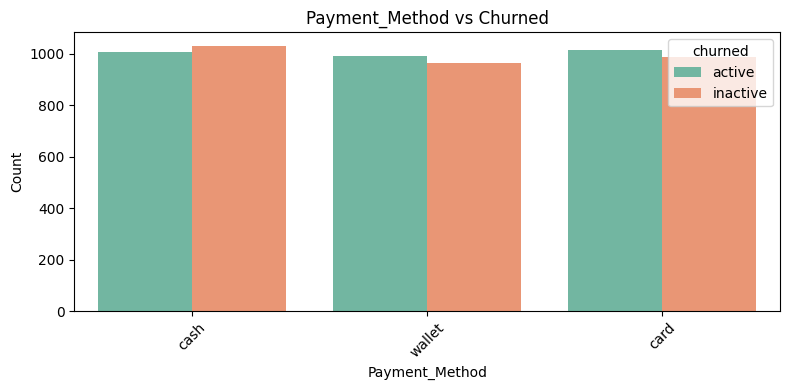


CROSSTAB: Churned vs Churned
churned   active  inactive
churned                   
active     100.0       0.0
inactive     0.0     100.0


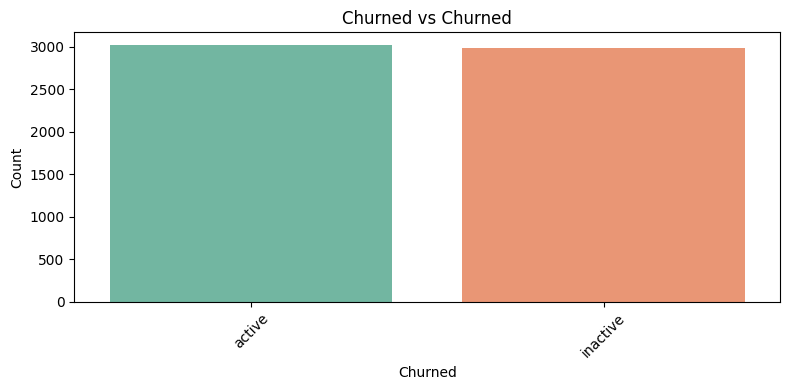


CROSSTAB: Delivery_Status vs Churned
churned          active  inactive
delivery_status                  
cancelled          50.6      49.4
delayed            49.6      50.4
delivered          50.6      49.4


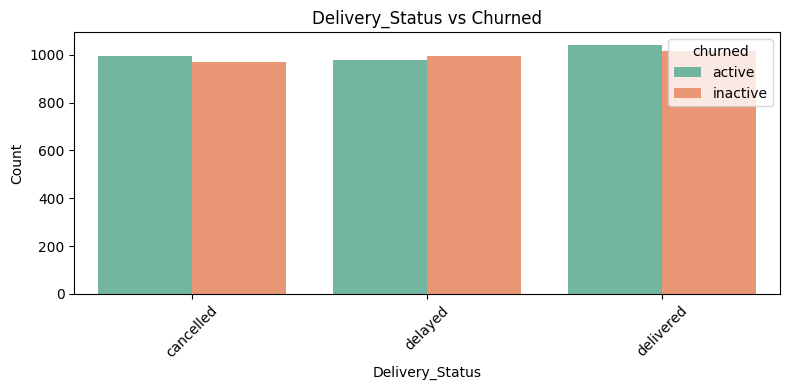

In [ ]:
import matplotlib.pyplot as plt
for col in obj_cols:
    print(f"\nCROSSTAB: {col.title()} vs Churned")
    print(pd.crosstab(df[col], df['churned'], normalize='index').round(3) * 100)

    # Plot
    plt.figure(figsize=(8, 4))
    snb.countplot(x=col, hue='churned', data=df, palette='Set2')
    plt.title(f'{col.title()} vs Churned')
    plt.xticks(rotation=45)
    plt.xlabel(col.title())
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [ ]:
le = LabelEncoder()
print("Churned Value Count Before LE:",df['churned'].value_counts())
df['churned'] = le.fit_transform(df['churned'])
print("Churned Value Count After LE:",df['churned'].value_counts())

Churned Value Count Before LE: churned
active      3016
inactive    2984
Name: count, dtype: int64
Churned Value Count After LE: churned
0    3016
1    2984
Name: count, dtype: int64


In [ ]:
nominal_cols = ['category','city','delivery_status','dish_name','gender','restaurant_name','payment_method']
df = pd.get_dummies(df,columns=nominal_cols,drop_first=True)
df.head()

,age,quantity,price,order_frequency,loyalty_points,churned,rating,category_continental,category_dessert,category_fast food,...,dish_name_pizza,dish_name_sandwich,gender_male,gender_other,restaurant_name_kfc,restaurant_name_mcdonald's,restaurant_name_pizza hut,restaurant_name_subway,payment_method_cash,payment_method_wallet
0,1,5,1478.27,38,238,0,3,False,False,False,...,False,False,True,False,False,True,False,False,True,False
1,1,3,956.04,24,81,0,2,False,False,False,...,False,False,True,False,True,False,False,False,False,True
2,2,2,882.51,42,82,1,3,False,False,False,...,False,False,False,True,False,False,True,False,True,False
3,2,4,231.30,27,45,1,2,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,2,1,1156.69,35,418,1,3,False,True,False,...,False,True,False,True,True,False,False,False,True,False


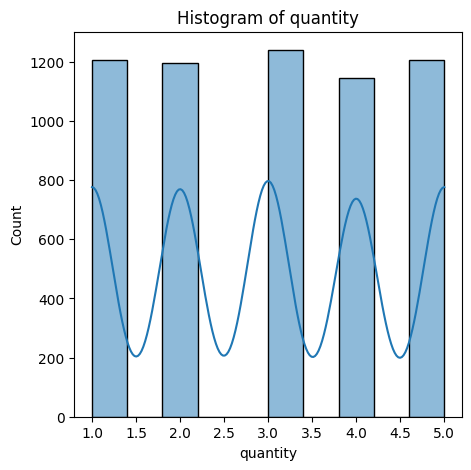

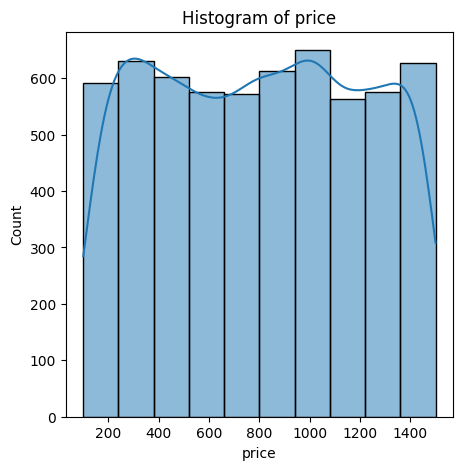

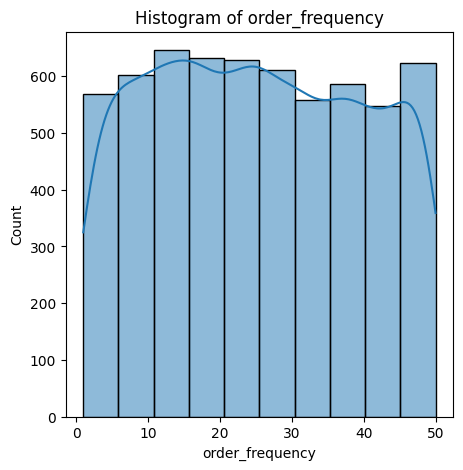

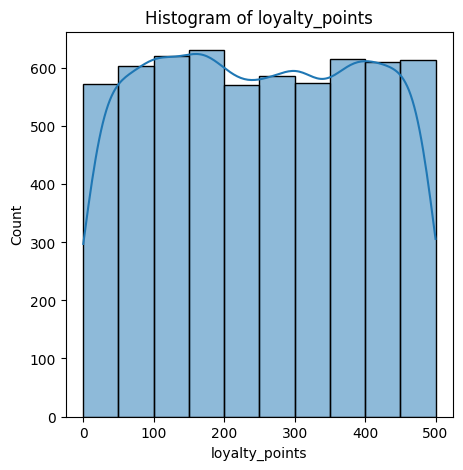

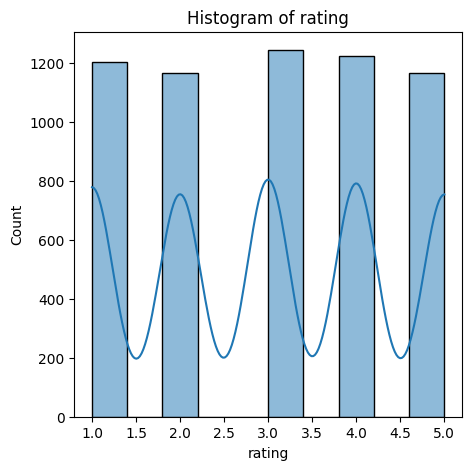

In [ ]:
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(5,5))
    snb.histplot(df[col],kde=True,bins=10)
    plt.title(f"Histogram of {col}")
    plt.show()
    

In [ ]:
ms =MinMaxScaler()
df[num_cols] = ms.fit_transform(df[num_cols])
print(df)

      age  quantity     price  order_frequency  loyalty_points  churned  \
0       1      1.00  0.984510         0.755102           0.476        0   
1       1      0.50  0.611396         0.469388           0.162        0   
2       2      0.25  0.558861         0.836735           0.164        1   
3       2      0.75  0.093595         0.530612           0.090        1   
4       2      0.00  0.754753         0.693878           0.836        1   
...   ...       ...       ...              ...             ...      ...   
5995    1      0.75  0.554003         0.551020           0.332        0   
5996    1      1.00  0.727296         0.224490           0.386        1   
5997    0      0.75  0.646969         0.612245           0.556        0   
5998    1      0.75  0.804344         0.734694           0.110        1   
5999    1      0.50  0.736591         0.020408           0.082        1   

      rating  category_continental  category_dessert  category_fast food  ...  \
0       0.50      

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

Y = df['churned']       
X = df.drop(['churned'], axis=1)  
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=0)
x_train,x_test,y_train,y_test = train_test_split(X_train,Y_train,train_size=0.8,random_state=0)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(f"Traning accuracy: {accuracy_score(y_test,y_pred)}")

knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
print(f"Testing accuracy: {accuracy_score(Y_test,Y_pred)}")

Traning accuracy: 0.490625
Testing accuracy: 0.5116666666666667


In [ ]:
metrics = ['euclidean', 'manhattan', 'minkowski']

results = []

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=7, metric=metric)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    tr_ac = accuracy_score(y_test,y_pred)

    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    ty_ac=accuracy_score(Y_test,Y_pred)
    results.append([metric,tr_ac,ty_ac])

for i in range(len(results)):
    print(f"Metrics :{ results[i][0]}  ||  Traning accuracy:{results[i][1]} ||  Testing accuracy :{results[i][2]}")

Metrics :euclidean  ||  Traning accuracy:0.490625 ||  Testing accuracy :0.5116666666666667
Metrics :manhattan  ||  Traning accuracy:0.5020833333333333 ||  Testing accuracy :0.5041666666666667
Metrics :minkowski  ||  Traning accuracy:0.490625 ||  Testing accuracy :0.5116666666666667
